In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os, sys
%cd /home/volkan/Repos/multi-tier/
from data_analysis.helpers import *

/home/volkan/.local/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


/home/volkan/Repos/multi-tier


mvip delay: 136483.065057822
mvipsbw delay: 367815.8611154983
mvipsbw2 delay: 131482.3196167598


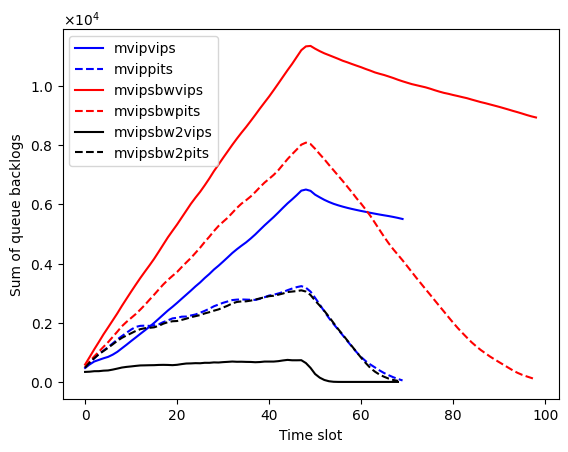

In [3]:
experiment_name = "mt-test"
topology = "abilene"
config_path = "sim_configs/sample_config.json"
#config_path = "sim_configs/" + experiment_name + "_config.json"
test_config = getTestConfig(config_path)
db_path = "sim_outputs/" + experiment_name + "_" + topology + "_db.json"
db = getJsonDb(db_path)

request_rate = 15
request_dist_param = 0.75
case_filters = [
    ("request_rate", request_rate, None),
    ("request_dist_param", request_dist_param, None),
]

param_list = simConfigToParamSets(test_config)
param_list = filterParamList(param_list, case_filters)
fig, ax = plt.subplots()
#for cache_pol in ["vip2", "vipsbw", "vipsbw2"]:
for cache_pol in ["mvip", "mvipsbw", "mvipsbw2"]:
    filters = [("cache_pol", cache_pol, None)]
    pol_param_list = filterParamList(param_list, filters)
    assert len(pol_param_list) == 1
    param_hash = str(hash(pol_param_list[0]))
    vips = singleEntrySumDataFieldAcrossNodes(
        topology,
        db[param_hash],
        "vip_count_sum",
    )
    pits = singleEntrySumDataFieldAcrossNodes(
        topology,
        db[param_hash],
        "pit_count_sum",
    )
    delay = singleEntrySumDataFieldAcrossNodes(
        topology,
        db[param_hash],
        "delay",
    )
    window_size = 3
    vip_moving_avg = np.convolve(vips, np.ones(window_size) / window_size, mode="valid")
    pit_moving_avg = np.convolve(pits, np.ones(window_size) / window_size, mode="valid")
    if cache_pol in ["vip2","mvip"]:
        drawstyle = "b"
    if cache_pol in ["vipsbw","mvipsbw"]:
        drawstyle = "r"
    if cache_pol in ["vipsbw2","mvipsbw2"]:
        drawstyle = "k"
    ax.plot(range(len(vip_moving_avg)), vip_moving_avg, "-"+drawstyle, label=cache_pol+"vips")
    ax.plot(range(len(pit_moving_avg)), pit_moving_avg, "--"+drawstyle, label=cache_pol+"pits")
    print(cache_pol + " delay: " + str(delay))

#ax.set_xlim([0, 95])
ax.set_xlabel("Time slot")
ax.set_ylabel("Sum of queue backlogs")
ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0), useMathText=True)
ax.legend()
#ax.legend(["VIP queues", "PIT queues", "VIP queues w/ cache bw constraint", "PIT queues w/ cache bw constraint"])
#fig_name = "_".join(tuple(map(str,(experiment_name,topology,request_rate,request_dist_param))))
#fig_path = "../sim_outputs/" + fig_name + ".pdf"
#plt.savefig(fig_path)
#plt.show()

ValueError: operands could not be broadcast together with shapes (1,72) (1,73) 

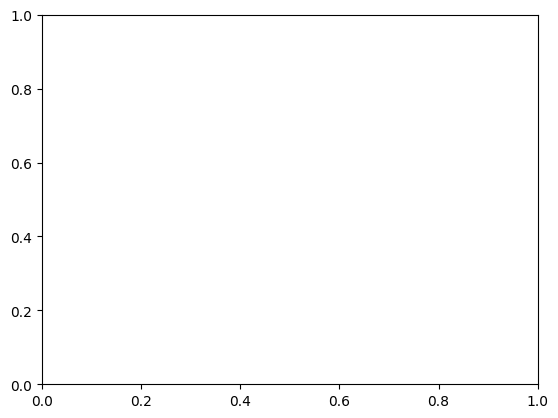

In [5]:
experiment_name = "mt-test"
topology = "abilene"
config_path = "sim_configs/sample_config.json"
#config_path = "sim_configs/" + experiment_name + "_config.json"
test_config = getTestConfig(config_path)
db_path = "sim_outputs/" + experiment_name + "_" + topology + "_db.json"
db = getJsonDb(db_path)

request_rate = 15
request_dist_param = 0.75
case_filters = [
    ("request_rate", request_rate, None),
    ("request_dist_param", request_dist_param, None),
]

param_list = simConfigToParamSets(test_config)
param_list = filterParamList(param_list, case_filters)
fig, ax = plt.subplots()
#for cache_pol in ["vip2", "vipsbw", "vipsbw2"]:
for cache_pol in ["mvip", "mvipsbw", "mvipsbw2"]:
    filters = [("cache_pol", cache_pol, None)]
    pol_param_list = filterParamList(param_list, filters)
    #assert len(pol_param_list) == 1
    #param_hash = str(hash(pol_param_list[0]))
    """ norms = singleEntrySumDataFieldAcrossNodes(
        topology,
        db[param_hash],
        "vip_pit_norm",
    )
    delay = singleEntrySumDataFieldAcrossNodes(
        topology,
        db[param_hash],
        "delay",
    ) """
    norms = getDataFieldSumAvgsAcrossSeeds(
        topology,
        db,
        pol_param_list,
        [1,2],
        [1,2,3,4,5],
        "vip_pit_norm",
    )
    delay = getDataFieldSumAvgsAcrossSeeds(
        topology,
        db,
        pol_param_list,
        [1,2],
        [1,2,3,4,5],
        "delay",
    )
    if cache_pol in ["vip2","mvip"]:
        drawstyle = "b"
    if cache_pol in ["vipsbw","mvipsbw"]:
        drawstyle = "r"
    if cache_pol in ["vipsbw2","mvipsbw2"]:
        drawstyle = "k"
    ax.plot(range(len(norms)), norms, "-"+drawstyle, label=cache_pol)
    print(cache_pol + " delay: " + str(delay))

#ax.set_xlim([0, 95])
ax.set_xlabel("Time slot")
ax.set_ylabel("Norms of queue backlogs")
ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0), useMathText=True)
ax.legend()
#ax.legend(["VIP queues", "PIT queues", "VIP queues w/ cache bw constraint", "PIT queues w/ cache bw constraint"])
#fig_name = "_".join(tuple(map(str,(experiment_name,topology,request_rate,request_dist_param))))
#fig_path = "../sim_outputs/" + fig_name + ".pdf"
#plt.savefig(fig_path)
#plt.show()